# 🚗 Uber Data Analysis

![img](https://amselbr01.files.wordpress.com/2017/07/08127982-photo-uber-banner.png?w=1024)

Uber Technologies, Inc., commonly known as Uber, is a San Francisco-based tech company that has revolutionized the transportation industry. Founded in 2009, Uber connects riders with drivers through its innovative mobile applications and websites. The company operates in approximately 70 countries and 10,500 cities worldwide, providing services such as ride-hailing, food delivery, and freight transport.

Uber's mission is to make movement accessible, allowing people to move and earn safely. It has over 131 million monthly active users and facilitates an average of 25 million trips per day. Uber is also committed to sustainability, pledging to become a fully electric, zero-emission platform by 2040.

In addition to transportation, Uber has expanded its services to include food delivery through Uber Eats and freight booking solutions. The company is dedicated to safety, developing new technologies and systems to improve safety for both riders and drivers. Uber's impact on the transportation industry has been profound, redefining how people move in the digital age.

# 🚗 TABLE OF CONTENTS 
1. [About the Dataset](#🚗-About-the-Dataset)
2. [Research Questions](#🚗-Research-Questions)
3. [Importing Libraries](#🚗-Importing-Libraries)
4. [Loading the Dataset](#🚗-Loading-the-Dataset)
5. [Descriptive Data Analysis and Cleaning](#🚗-Descriptive-Data-Analysis-and-Cleaning)
6. [Exploratory Data Analysis and Visualizations](#🚗-Exploratory-Data-Analysis-and-Visualizations)
   * 6.1 [Time based Analysis](#🚗-Time-based-Analysis)
   * 6.2 [Categorical Analysis](#🚗-Categorical-Analysis)
7. [Summary and Conclusion](#🚗-Summary-and-Conclusion)       

# 🚗 About the Dataset

**Description**:
The project is about on world's largest taxi company Uber inc. Uber delivers service to lakhs of customers daily. Now it becomes really important to manage their data properly to come up with new business ideas to get best results.
The modern era has witnessed a significant transformation in transportation with the advent of ride-sharing platforms. In this analysis, we delve into a comprehensive examination of a ride-sharing dataset, aiming to extract valuable insights that can inform business strategies and enhance the overall user experience.

The dataset contains the following fields: 

| Columns | Description |
| --- | --- |
|START_DATE | The start date and time of the trip|
|END_DATE | The end date and time of the trip|
|CATEGORY | The category of the trip|
|START | Pickup location|
|STOP | Drop location|
|MILES | Distance of the trip in miles|
|PURPOSE | Purpose of the trip|

# 🚗 Research Questions

The primary objectives of this analysis are as follows:
1. `Understand Ride Patterns`: Investigate the patterns and trends in ride data to uncover key metrics such as average ride duration, ride frequency, and distance traveled.
2. `Identify Popular Categories`: Explore the popularity of different ride categories, examining which types of rides are most prevalent among users.
3. `Temporal Analysis`: Analyze temporal aspects of ride-sharing, including variations in ride volume and user behavior across different timescales, such as days of the week and hours of the day.
4. `User Segmentation`: Segment users based on relevant characteristics and explore how different user groups interact with the ride-sharing service.
5. `Uncover Challenges and Opportunities`: Identify challenges and limitations in the dataset, acknowledging potential biases, and highlight opportunities for improvement or further investigation

# 🚗 Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

# 🚗 Loading the Dataset

In [2]:
df = pd.read_csv(r'C:\Users\MEGAMIND\Downloads\uber data\UberDataset.csv')

# 🚗 Descriptive Data Analysis and Cleaning

In [3]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
df.shape

(1156, 7)

In [5]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

In [6]:
# Renaming the columns in smallcase for ease
df = df.rename(columns={'START_DATE':'start_date', 'END_DATE':'end_date', 'CATEGORY':'category', 
                   'START':'start', 'STOP':'stop', 'MILES':'miles', 'PURPOSE':'purpose'})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   start_date  1156 non-null   object 
 1   end_date    1155 non-null   object 
 2   category    1155 non-null   object 
 3   start       1155 non-null   object 
 4   stop        1155 non-null   object 
 5   miles       1156 non-null   float64
 6   purpose     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [8]:
# Convert 'start_date' and 'end_date' to datetime format
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')
df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')

In [9]:
# Creating `start_day` and `end_day` columns
df['start_day'] = df['start_date'].dt.day_name()  
df['end_day'] = df['end_date'].dt.day_name()  

In [10]:
# Creating `duration` column in minutes -
df['duration'] = (df['end_date'] - df['start_date']).dt.total_seconds() / 60

In [11]:
df.head()

,start_date,end_date,category,start,stop,miles,purpose,start_day,end_day,duration
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Friday,Friday,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,Saturday,Saturday,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Saturday,Saturday,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Tuesday,Tuesday,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Wednesday,Wednesday,67.0


In [12]:
df.dtypes

start_date    datetime64[ns]
end_date      datetime64[ns]
category              object
start                 object
stop                  object
miles                float64
purpose               object
start_day             object
end_day               object
duration             float64
dtype: object

In [13]:
df.describe()

,miles,duration
count,1156.000000,1155.000000
mean,21.115398,23.243290
std,359.299007,27.318277
min,0.500000,0.000000
25%,2.900000,10.000000
50%,6.000000,16.000000
75%,10.400000,27.500000
max,12204.700000,336.000000


In [14]:
df.describe(include='object')

,category,start,stop,purpose,start_day,end_day
count,1155,1155,1155,653,1155,1155
unique,2,177,188,10,7,7
top,Business,Cary,Cary,Meeting,Friday,Friday
freq,1078,201,203,187,206,203


In [15]:
# Checking for NaN values
df.isna().sum()

start_date      1
end_date        1
category        1
start           1
stop            1
miles           0
purpose       503
start_day       1
end_day         1
duration        1
dtype: int64

In [16]:
df['purpose'].fillna('Unknown', inplace=True)

In [17]:
df.isna().sum()

start_date    1
end_date      1
category      1
start         1
stop          1
miles         0
purpose       0
start_day     1
end_day       1
duration      1
dtype: int64

In [18]:
df.dropna(inplace=True)

In [19]:
df.isna().sum()

start_date    0
end_date      0
category      0
start         0
stop          0
miles         0
purpose       0
start_day     0
end_day       0
duration      0
dtype: int64

In [20]:
# Checking for duplicated values
df.duplicated().sum()

1

In [21]:
df.loc[df.duplicated()]

,start_date,end_date,category,start,stop,miles,purpose,start_day,end_day,duration
492,2016-06-28 23:34:00,2016-06-28 23:59:00,Business,Durham,Cary,9.9,Meeting,Tuesday,Tuesday,25.0


In [22]:
df = df.loc[~df.duplicated().reset_index(drop=True).copy()]

In [23]:
df.duplicated().sum()

0

In [24]:
df.shape

(1154, 10)

# 🚗 Exploratory Data Analysis and Visualizations

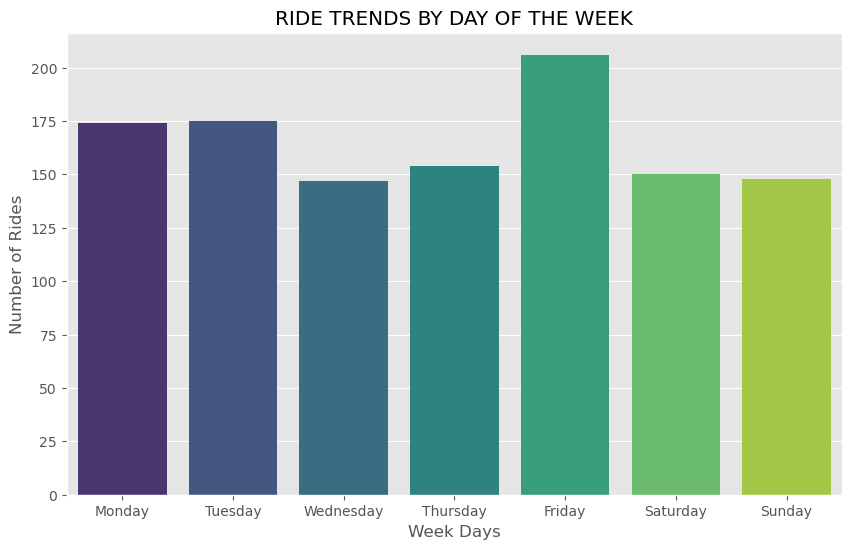

In [25]:
plt.figure(figsize=(10,6))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=df, x='start_day', palette='viridis', order=order)
plt.title('RIDE TRENDS BY DAY OF THE WEEK')
plt.xlabel('Week Days')
plt.ylabel('Number of Rides')
plt.show()

`Most Popular Day`: **Friday**

The analysis of the `start day` reveals that a significant number of rides are taken on Fridays. This could be indicative of a higher demand for rides on Fridays compared to other days of the week. Understanding and capitalizing on this pattern can help optimize service availability and resource allocation on Fridays.

`Recommendations`:
- Consider offering special promotions or incentives on Fridays to further boost ride demand.
- Ensure that there is ample availability of drivers and vehicles during peak hours on Fridays.

## 🚗 Time based Analysis
- Ride Trends Over Time:

In [26]:
# Extract information about the month, day, and hour
df['month'] = df['start_date'].dt.month
df['day'] = df['start_date'].dt.day
df['hour'] = df['start_date'].dt.hour

In [27]:
df.head()

,start_date,end_date,category,start,stop,miles,purpose,start_day,end_day,duration,month,day,hour
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Friday,Friday,6.0,1,1,21
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,Saturday,Saturday,12.0,1,2,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Saturday,Saturday,13.0,1,2,20
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Tuesday,Tuesday,14.0,1,5,17
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Wednesday,Wednesday,67.0,1,6,14


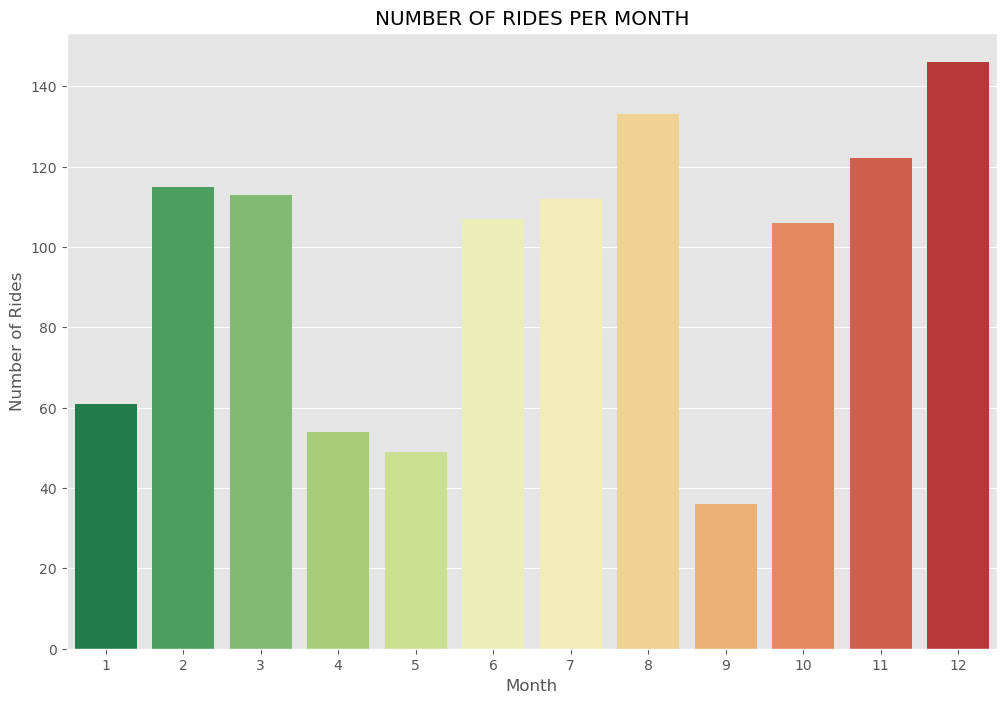

In [28]:
# Plotting the number of rides per month
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='month', palette='RdYlGn_r')
plt.title('NUMBER OF RIDES PER MONTH')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.show()

**Findings** - 
- Peak Months: The highest number of rides occur in `August` and `December`.
- Low Months: The lowest number of rides are in `May` and `September`.
- Variation: There is a significant variation in the number of rides across different months.

**Recommendations**:
Leverage the popularity of `Peak Months` rides for targeted promotions or marketing campaigns. Investigate external factors influencing ride patterns and consider adapting strategies accordingly.

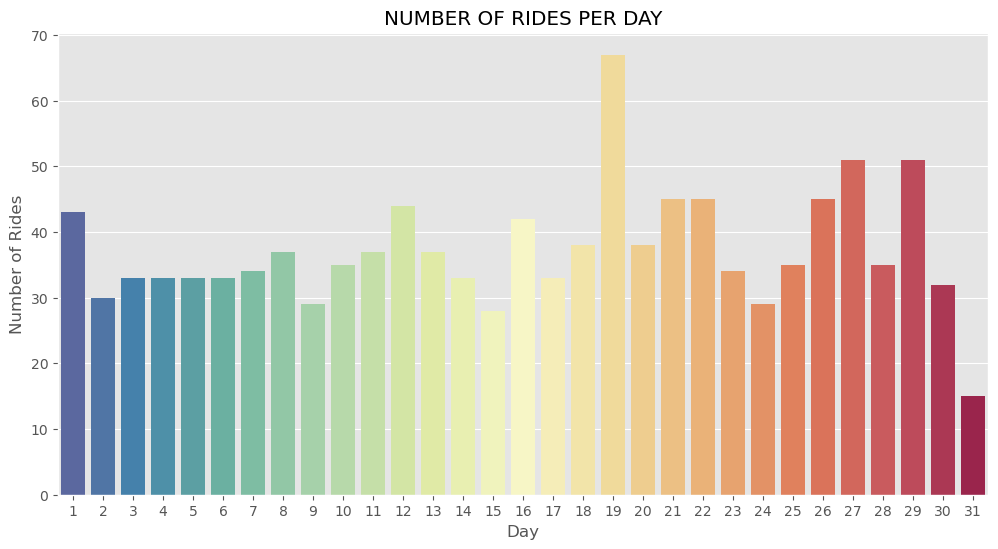

In [29]:
# Plot the number of rides per day
plt.figure(figsize=(12, 6))
sns.countplot(x='day', data=df, palette='Spectral_r')
plt.title('NUMBER OF RIDES PER DAY')
plt.xlabel('Day')
plt.ylabel('Number of Rides')
plt.show()

**Findings** -

- Peak Days: The highest number of rides occur in days `19`, `27`, `29`.
- Low Days: The lowest number of rides are in the days `9`, `15`, `24`, `31`.
- Variation: There is a significant variation in the number of rides across different days.

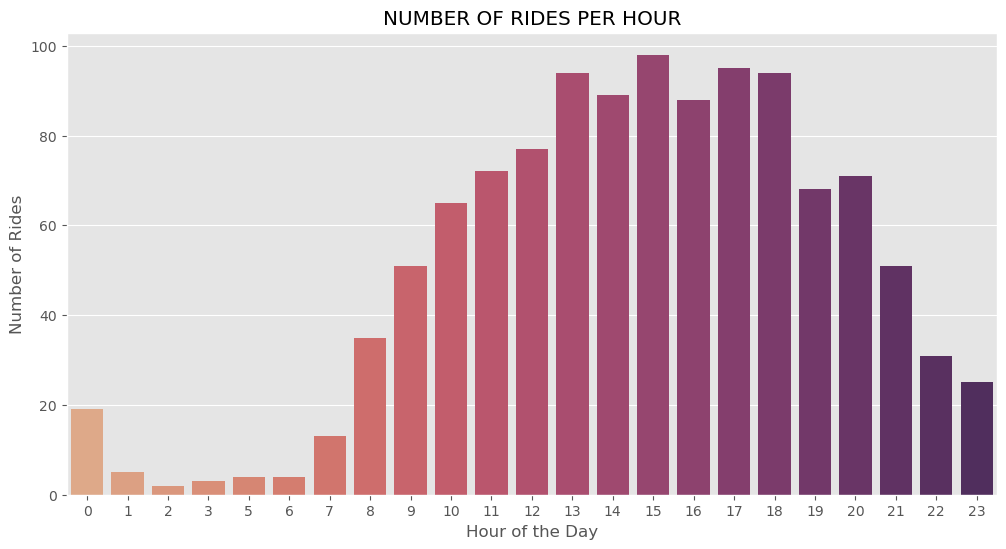

In [30]:
# Plot the number of rides per hour
plt.figure(figsize=(12, 6))
sns.countplot(x='hour', data=df, palette='flare')
plt.title('NUMBER OF RIDES PER HOUR')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.show()

**Findings** -

- Peak hours: The highest number of rides occur in hours `13` to `18`.
- Low hours: The lowest number of rides are in the hours `0` to `7`.
- Variation: There is a significant variation in the number of rides in different hours of the day.

**Recommendations**:
- Optimize resource allocation, ensuring an adequate supply of vehicles during peak hours.
- Consider time-specific promotions or incentives to further boost usage during non-peak hours.

## 🚗 Categorical Analysis
- Distribution of Ride Categories:

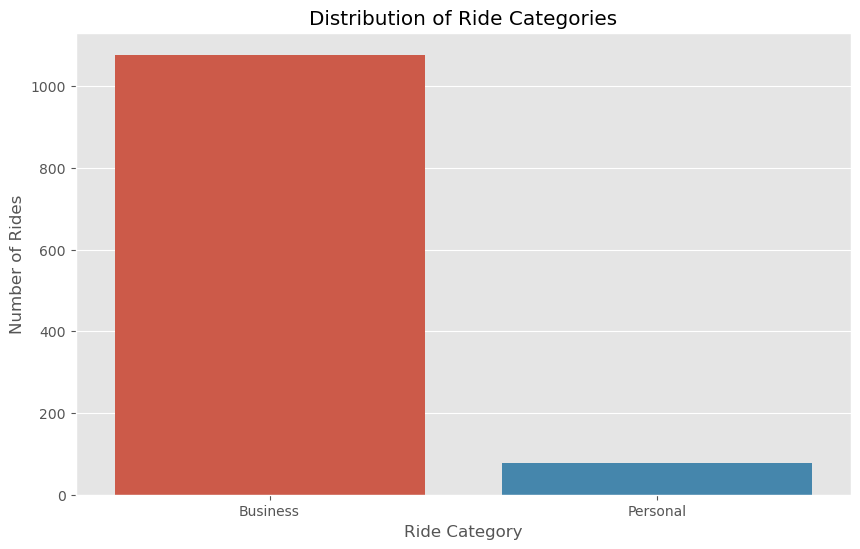

In [31]:
# Plot the distribution of ride categories
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=df)
plt.title('Distribution of Ride Categories')
plt.xlabel('Ride Category')
plt.ylabel('Number of Rides')
plt.show()

The data reveals a noteworthy trend, indicating that a substantial portion of the rides fall under the business category. This insight is crucial for understanding the user base and tailoring services to meet specific needs.

**Recommendations**:
- Tailor promotions or features to cater to business users.
- Consider partnerships or features that enhance the business-use experience.

## 🚗 Purpose Analysis

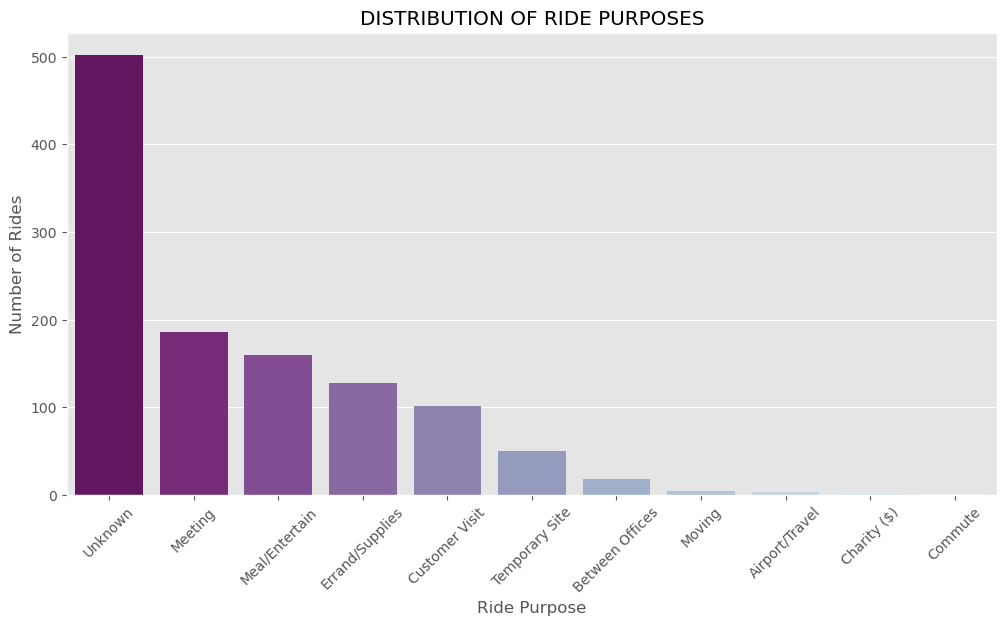

In [32]:
# Plot the distribution of ride purposes
plt.figure(figsize=(12, 6))
sns.countplot(x='purpose', data=df, order=df['purpose'].value_counts().index, palette='BuPu_r')
plt.title('DISTRIBUTION OF RIDE PURPOSES')
plt.xlabel('Ride Purpose')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Understanding the primary reasons for rides provides valuable information about user behavior and preferences. The analysis indicates that the top purposes include meetings, meals/entertainment, errands/supplies, and customer visits.

**Recommendations**:
- Tailor promotions or loyalty programs based on popular ride purposes.
- Consider partnerships with businesses related to top ride purposes.

## 🚗 Duration Analysis
- Distribution of ride durations in minutes

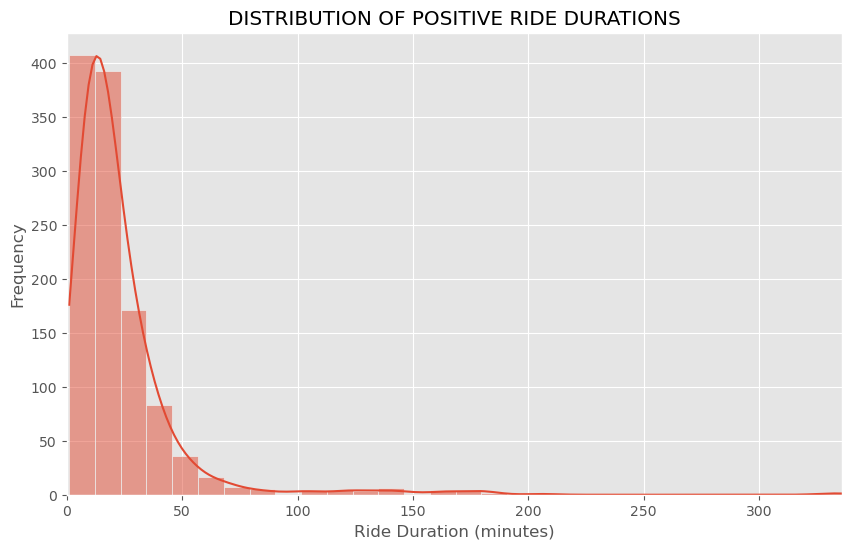

In [33]:
# Filter out rides with a duration greater than 0
positive_durations = df[df['duration'] > 0]['duration']

# Distribution of positive ride durations in minutes
plt.figure(figsize=(10, 6))
sns.histplot(positive_durations, bins=30, kde=True)
plt.title('DISTRIBUTION OF POSITIVE RIDE DURATIONS')
plt.xlabel('Ride Duration (minutes)')
plt.ylabel('Frequency')
plt.xlim(0, positive_durations.max())  # Set the x-axis range
plt.show()

The analysis of ride durations reveals that a significant portion of rides falls within the 0 to 40 minutes range. This is a crucial insight into user behavior, indicating that most users prefer relatively short-duration rides.

**Recommendations**:
- Optimize service and pricing models to align with the prevalent ride duration preferences.
- Consider introducing packages or promotions tailored to short-duration rides.

**Ride duration against distance**

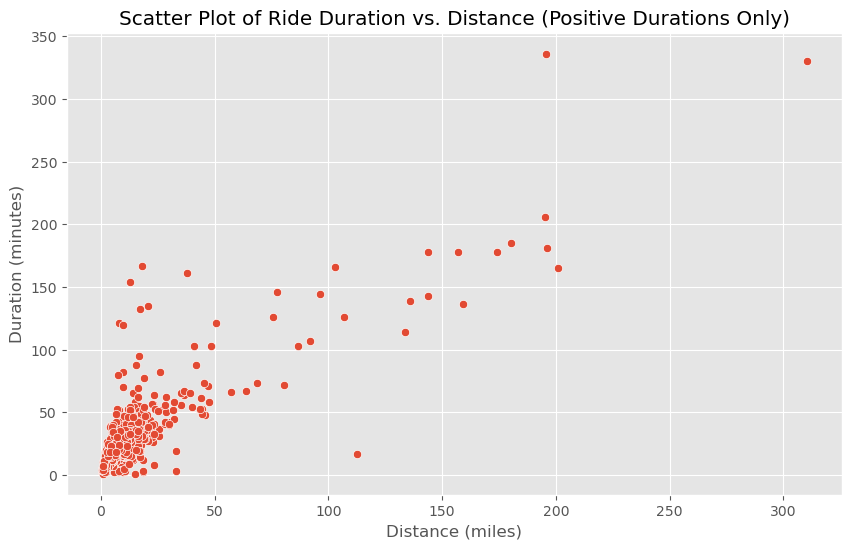

In [34]:
# Filter out rides with a duration greater than 0
positive_durations = df[df['duration'] > 0]

# Scatter plot of ride duration against distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='miles', y='duration', data=positive_durations)
plt.title('Scatter Plot of Ride Duration vs. Distance (Positive Durations Only)')
plt.xlabel('Distance (miles)')
plt.ylabel('Duration (minutes)')
plt.show()

Understanding the typical distance and duration of rides is crucial for optimizing services and predicting user behavior.

**Recommendations**:
- Optimize pricing or promotions for rides falling within the most common distance range.
- Consider loyalty programs or incentives for longer-distance rides.

**Favourite Destinations**

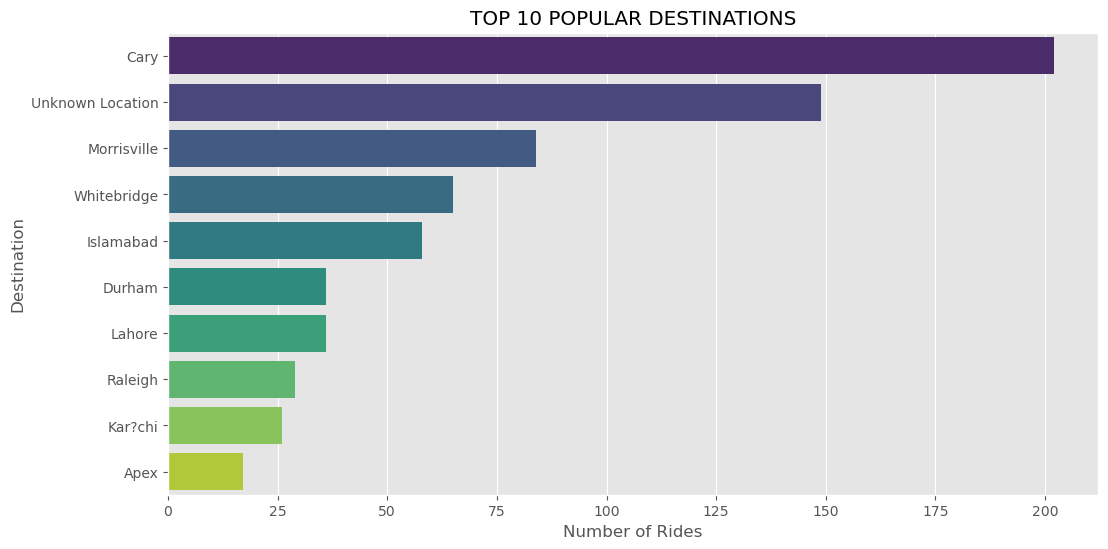

In [35]:
popular_destinations = df['stop'].value_counts().head(10)

# Plot the top 10 popular destinations
plt.figure(figsize=(12, 6))
sns.barplot(x=popular_destinations.values, y=popular_destinations.index, palette='viridis')
plt.title('TOP 10 POPULAR DESTINATIONS')
plt.xlabel('Number of Rides')
plt.ylabel('Destination')
plt.show()

Understanding the most popular destination, in this case, `Cary`, is crucial for businesses to target promotions, improve services, and allocate resources efficiently.

**Key Findings**:
Top Destination: `Cary` stands out as the most frequented destination among the rides.

**User Preferences**: Investigate reasons for the popularity of `Cary`. Are there specific attractions, events, or businesses driving this trend.

**Business Opportunities**: Explore potential partnerships or marketing strategies to capitalize on the popularity of rides to `Cary`.

**Recommendations**:
- Tailor promotions or partnerships that align with the interests of users traveling to Cary.
- Consider expanding services or offerings in and around Cary based on user demand.

# 🚗 Summary and Conclusion

### INSIGHTS -

The analysis of the rideshare dataset reveals several key insights into user behavior, ride patterns, and popular destinations. Here's a concise summary of the findings:

- **Temporal Patterns**:
  - **Peak Month**: `August` and `December` are the peak months
  - **Peak Day**: Most rides are taken on `Fridays`, indicating higher usage towards the end of the workweek.
  - **Peak Hour**: The busiest time for rides is between `13 and 18 PM`, possibly aligning with lunch breaks or midday activities.

- **Ride Duration**:
The majority of ride durations fall within the `0 to 40-minute range`, indicating relatively short trips.

- **Ride Categories**:
`Business` rides significantly outnumber `personal` rides, highlighting the professional nature of the service.

- **Purpose of Rides**:
The most common purposes for rides are `meetings`, followed by meal/entertainment, errands/supplies, and customer visits.

- **Distance and Duration**:
Most rides cover distances between `0 and 50 miles`, typically taking 0 to 75 minutes.

- **Popular Destination**: 
`Cary` emerges as the most popular destination, indicating a concentration of ride activities in this location.

# 🚗 THE END